In [14]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

In [15]:
df = pd.DataFrame(columns=['Title','Company','Ratings','Reviews','Experience','Salary','Location','Job_Post_History','URL'])

In [16]:
for param in range(1,4):
    url = "https://www.naukri.com/data-analyst-jobs-in-mumbai-param?k=data%20analyst&l=mumbai"

    driver = webdriver.Chrome("./chromedriver")
    driver.get(url)

    time.sleep(10)

    soup = BeautifulSoup(driver.page_source,'html5lib')

    # print(soup.prettify())

    driver.close()

    results = soup.find(class_='list')
    job_elems = results.find_all('article',class_='jobTuple bgWhite br4 mb-8')

    for job_elem in job_elems:

        # URL to apply for the job     
        URL = job_elem.find('a',class_='title fw500 ellipsis').get('href')
    #     print(URL.strip())

        # Post Title
        Title = job_elem.find('a',class_='title fw500 ellipsis')

        # Company Name
        Company = job_elem.find('a',class_='subTitle ellipsis fleft')

        # Ratings
        rating_span = job_elem.find('span',class_='starRating fleft dot')
        if rating_span is None:
            continue
        else:
            Ratings = rating_span.text

        # Reviews Counts
        Review_span = job_elem.find('a',class_='reviewsCount ml-5 fleft blue-text')
        if Review_span is None:
            continue
        else:
            Reviews = Review_span.text

        # Years of experience Required
        Exp = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi experience')
        Exp_span = Exp.find('span',class_='ellipsis fleft fs12 lh16')
        if Exp_span is None:
            continue
        else:
            Experience = Exp_span.text

        # Salary offered for the job
        Sal = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi salary')
        Sal_span = Sal.find('span',class_='ellipsis fleft fs12 lh16')
        if Sal_span is None:
            continue
        else:
            Salary = Sal_span.text

        # Location for the job post
        Loc = job_elem.find('li',class_='fleft grey-text br2 placeHolderLi location')
        Loc_exp = Loc.find('span',class_='ellipsis fleft fs12 lh16')
        if Loc_exp is None:
            continue
        else:
            Location = Loc_exp.text

        # Number of days since job posted
        Hist = job_elem.find("div",["type br2 fleft grey","type br2 fleft green"])
        Post_Hist = Hist.find('span',class_='fleft fw500')
        if Post_Hist is None:
            continue
        else:
            Post_History = Post_Hist.text

    #   Appending data to the DataFrame 
        df=df.append({'URL':URL,'Title':Title.text,'Company':Company.text,'Ratings':Ratings,'Reviews':Reviews,'Experience':Experience,'Salary':Salary,'Location':Location,'Job_Post_History':Post_History},ignore_index = True)

KeyboardInterrupt: 

In [17]:
df.shape

(13, 9)

In [18]:
df.head()

,Title,Company,Ratings,Reviews,Experience,Salary,Location,Job_Post_History,URL
0,Senior Data Analyst - Workforce Management Pla...,TTEC,4.1,(575 Reviews),1-6 Yrs,Not disclosed,Mumbai,2 Days Ago,https://www.naukri.com/job-listings-senior-dat...
1,Senior Data Analyst-Turbo Cross Sell,idfc first bank,3.9,(3603 Reviews),3-6 Yrs,Not disclosed,Navi Mumbai,2 Days Ago,https://www.naukri.com/job-listings-senior-dat...
2,Data Analyst,ICICI Lombard,3.8,(1782 Reviews),1-3 Yrs,"3,00,000 - 5,50,000 PA.",Mumbai,Few Hours Ago,https://www.naukri.com/job-listings-data-analy...
3,Data Analyst,Bauer Corporate Services Pvt Ltd,3.3,(6 Reviews),3-5 Yrs,Not disclosed,Mumbai Suburban,1 Day Ago,https://www.naukri.com/job-listings-data-analy...
4,Data Analyst - Workforce Management Planning,TTEC,4.1,(575 Reviews),1-6 Yrs,Not disclosed,Mumbai,2 Days Ago,https://www.naukri.com/job-listings-data-analy...


In [19]:
df.to_csv("./scraped_data.csv", mode = 'a', index=False)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

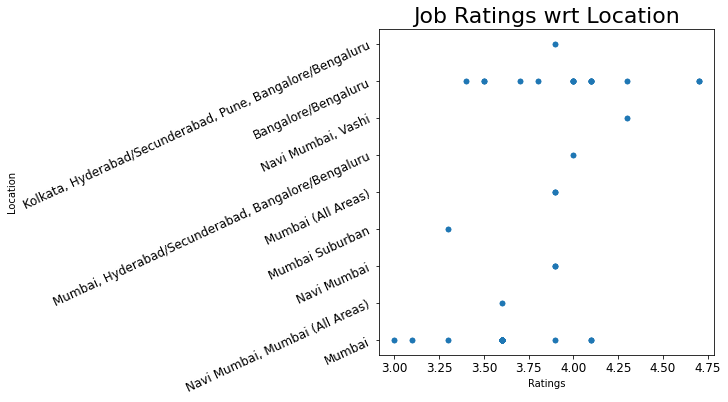

In [88]:
dataframe = pd.read_csv("./scraped_data.csv")
dataframe.plot.scatter(x = 'Ratings', y = 'Location', figsize=(6,6), fontsize=12)
plt.yticks(rotation=25, ha='right')
plt.title("Job Ratings wrt Location", fontsize=22)
plt.savefig("JobRatings.png", facecolor='white', bbox_inches='tight')
plt.show()

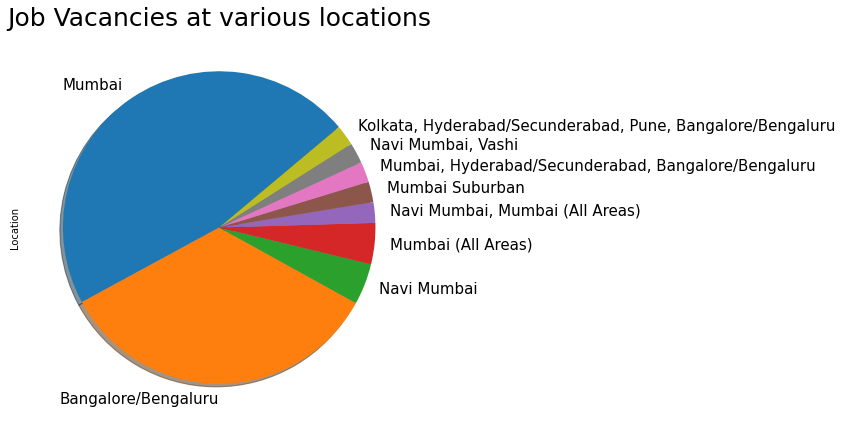

In [89]:
dataframe["Location"].value_counts()[:9].plot.pie(figsize=(7,8),shadow=True,startangle=40,fontsize=15)
plt.title("Job Vacancies at various locations",fontsize=25)
plt.savefig("JobVacancies", facecolor='white', bbox_inches='tight')
plt.show()

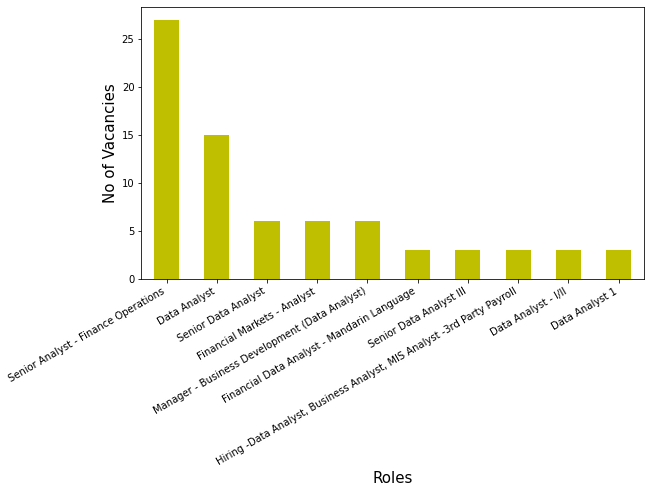

In [94]:
dataframe["Title"].value_counts()[:10].plot.bar(figsize=(9,5),fontsize=10,color="y")
plt.xticks(rotation=30,ha='right')
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.savefig("JobVacanciesBar", facecolor='white', bbox_inches='tight')
plt.show()

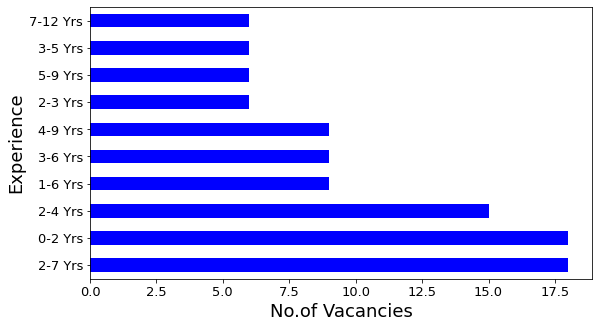

In [95]:
dataframe["Experience"].value_counts()[:10].plot.barh(figsize=(9,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.savefig("Experience.png",facecolor='white', bbox_inches='tight')
plt.show()